In [1]:
import pandas as pd
import numpy as np
from ECIR_new import ECIRModel
from CIRModel import BasicCIRModel
from yieldCurvePrediction import yieldCurvePredictor

In [2]:
class strategy:

    def __init__(self, model, dates, data):

        self.model = model
        self.dates = dates
        self.data = data

    def prices(self):

        mod_dict = {}
        price_dict = {}
        
        for date in self.dates:
    
            mod_dict[date] = yieldCurvePredictor(self.model, date, self.data) 
            price_dict[date] = mod_dict[date].comb_data()[1]
    
        return price_dict

    def buy_sell(self):

        prices = self.prices()
    
        for date in self.dates:
    
            bonds = []
        
            for bond in prices[date].index:
                if prices[date]['Simulated Prices'][bond] < prices[date]['Actual Prices'][bond]:
                    bonds.append(-1)
                else:
                   bonds.append(1)
            prices[date]['Buy?'] = bonds 

        return prices

    def profit(self, cash = 1000000):

        prices = self.buy_sell()
        weights = 1 / len(prices[self.dates[0]])
        value = weights*cash
        invested = np.zeros(len(prices[self.dates[0]]))
        shares = np.zeros(len(prices[self.dates[0]]))
        profit = np.zeros(len(prices[self.dates[0]]))
        prices = self.buy_sell()
        
        for i in range(len(self.dates)):

            #errs = pd.DataFrame({'Error' :np.abs(prices[self.dates[i]]['Actual Prices'] - prices[self.dates[i]]['Simulated Prices'])})

            #errs = errs.sort_values(by = 'Error')
            #errs['Invest?'] = np.zeros(len(errs))
            #new_index = errs.index
            #index_ones = new_index[:5]
            #index_zeros = new_index[5:]
            #errs['Invest?'][index_ones] = np.ones(5)
            #errs['Invest?'][index_zeros] = np.zeros(len(errs) - 5)

            #prices[dates[i]] = prices[dates[i]].join(errs)
            
            for j in range(len(prices[self.dates[i]]['Actual Prices'])):
                
                profit[j] += (shares[j] * prices[self.dates[i]]['Actual Prices'][j]) - invested[j]
                yesterday_invested = np.sum(invested)
                
                shares[j] = np.floor(value / prices[self.dates[i]]['Actual Prices'][j]) #* prices[self.dates[i]]['Invest?'][j]
                invested[j] = (shares[j] * prices[self.dates[i]]['Actual Prices'][j]) #* prices[self.dates[i]]['Invest?'][j]
                
                if prices[self.dates[i]]['Buy?'][j] == -1:
                    invested[j] *= -1
                    shares[j] *= -1
        
            cash += (np.sum(profit) + yesterday_invested - np.sum(invested))
            value = weights*cash

        print(invested)

        return pd.DataFrame({'Profit' : profit}).set_index(prices[dates[0]].index)

In [4]:
ECIR = strategy(ECIRModel(**params_ecir), dates, data)
ECIR.buy_sell()

0.47415595564318636
0.5169967228555304
0.3543654120330627
0.4795196296803191
0.42203673800357455
0.5040137043517402
0.49291627120596265
0.4442794760550667
0.5434757047039297
0.44909035009045284
0.5270238812818303
0.3976659348742758
0.48341545689449983
0.47581261051135726
0.5031170083003167
0.39522192387960087
0.540531272880902
0.3731547986122263
0.5053396221922929
0.4569677348200326
0.40988057629152463
0.48529535802475043
0.5462498171572898
0.3863230585769643
0.5494687178527409
0.44322560641610664
0.5565948299444687
0.45618518782071915
0.4540737178237195
0.5433387883193749
0.43716407128331636
0.4703915795282028
0.38100904378069844
0.5111149979623825
0.4041758030238246
0.5467004553072686
0.5576694579784174
0.4084920070028323
0.4192157011467469
0.450477902784974
0.442181199247065
0.4459307225191859
0.5320534303728768
0.5630029401901424
0.3262981399351276
0.5475749971357201
0.48361442374984676
0.44484869085405615
0.5877189846056832
0.5178879104740102
0.3177106167877604
0.49238638749774566

{Timestamp('2024-03-15 00:00:00'):         Actual Prices  Simulated Prices  Buy?
 DGS3MO     986.734888        985.576652    -1
 DGS1       951.709539        947.719901    -1
 DGS2       911.209084        904.841663    -1
 DGS3       874.932213        863.547267    -1
 DGS4       840.937548        831.320200    -1
 DGS5       808.079166        792.040165    -1
 DGS6       775.942037        752.456764    -1
 DGS7       745.232609        724.056818    -1
 DGS8       717.026255        694.323605    -1
 DGS9       691.241153        670.756021    -1
 DGS10      667.335093        650.007245    -1
 DGS11      644.760451        619.373711    -1
 DGS12      623.325199        601.641199    -1
 DGS13      602.954346        576.766945    -1
 DGS14      583.594017        561.247296    -1
 DGS15      565.206795        542.548885    -1
 DGS16      547.767806        519.689548    -1
 DGS17      531.261510        507.466373    -1
 DGS18      515.679167        489.689205    -1
 DGS19      501.016904    

In [3]:
# Load the DGS_30 data
dgs_30_data = pd.read_csv('Data Folder/DGS_30.csv')
# Load the DGS3MO data
dgs3mo_data = pd.read_csv('Data Folder/DGS3MO.csv')

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

dgs3mo_data.rename(columns={'DATE': 'Date'}, inplace=True)
dgs3mo_data['Date'] = pd.to_datetime(dgs3mo_data['Date'])
dgs3mo_data.set_index('Date', inplace=True)

# Insert the DGS3MO data into the DGS_30 data as the first column
dgs_30_data.insert(0, 'DGS3MO', dgs3mo_data['DGS3MO'])

data=dgs_30_data

dates = data.loc[data.index >= '2024-03-15'].index

params_ecir = {
    "kappa": 0.01227,    
    "mu_r": 0.09854,     
    "sigma": 0.09395,    
    "mu": 0.002995,      
    "gamma": 0.002321,   
    "r": 66,             
    "p": 0.3049          
}

params_cir = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

In [123]:
cir_ann = []
ecir_ann = []

for i in range(50):
    CIR = strategy(BasicCIRModel(**params_cir), dates, data)
    ECIR = strategy(ECIRModel(**params_ecir), dates, data)
            
    CIR_profit = CIR.profit(1000000).rename(columns = {'Profit' : 'CIR'})
    ECIR_profit = ECIR.profit(1000000).rename(columns = {'Profit' : 'ECIR'})
    
    profits = pd.concat([CIR_profit, ECIR_profit], axis = 1)

    cir_ann.append((np.sum(profits)*100*12/1000000)[0])
    ecir_ann.append((np.sum(profits)*100*12/1000000)[1])
    

In [6]:
ECIR = strategy(ECIRModel(**params_ecir), dates, data)
ECIR_profit = ECIR.profit(1000000).rename(columns = {'Profit' : 'ECIR'})

In [5]:
np.sum(ECIR_profit)

ECIR    26433.984747
dtype: float64

In [7]:
np.sum(ECIR_profit)

ECIR    26433.984747
dtype: float64

In [11]:
CIR = strategy(BasicCIRModel(**params_cir), dates, data)
CIR_profit = CIR.profit(1000000).rename(columns = {'Profit' : 'CIR'})

In [10]:
np.sum(CIR_profit)

CIR    3022.737209
dtype: float64

In [12]:
np.sum(CIR_profit)

CIR    3020.415556
dtype: float64

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Annualized Profit (%)')

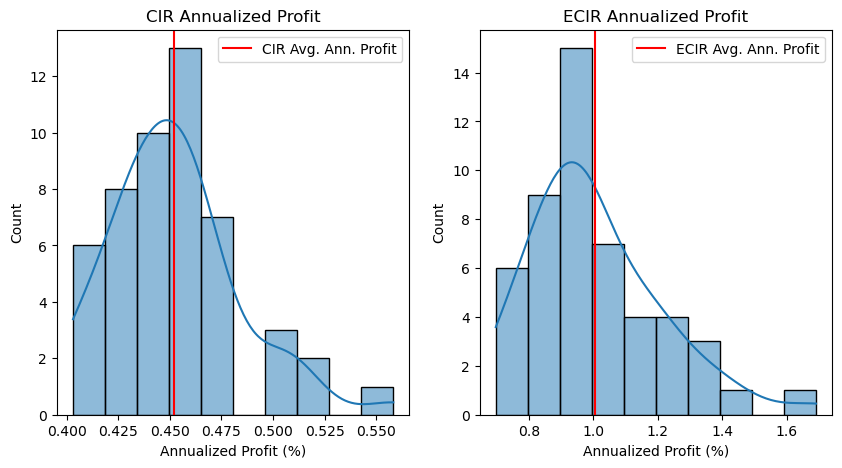

In [149]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(cir_ann, bins = 10, kde = True)
plt.axvline(np.mean(cir_ann), color = 'red', label = 'CIR Avg. Ann. Profit')
plt.legend()
plt.title('CIR Annualized Profit')
plt.xlabel('Annualized Profit (%)')
plt.subplot(1, 2, 2)
sns.histplot(ecir_ann, bins = 10, kde = True)
plt.axvline(np.mean(ecir_ann), color = 'red', label = 'ECIR Avg. Ann. Profit')
plt.legend()
plt.title('ECIR Annualized Profit')
plt.xlabel('Annualized Profit (%)')

In [152]:
print('CIR Average Annualized Profit:', str(round(np.mean(cir_ann), 2)), '%')
print('ECIR Average Annualized Profit:', str(round(np.mean(ecir_ann), 2)), '%')

CIR Average Annualized Profit: 0.45 %
ECIR Average Annualized Profit: 1.01 %
